# Time Series Fundamentals

We are going to create manually some time series which reflect several key aspect of a time serie. Especially:
* The trend
* The seasonality
* The noise
* Impulsion


## Import librairies

In [3]:
%config Completer.use_jedi = False
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [7]:
# This function will be used to plot all the time series

def plot_series(time,series,format="-",start=0,end=None,label=None):
    
    plt.plot(time[start:end],series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    if label:
        plt.legend(fontsize=14)
    
    plt.grid(True)

## Trend

We will create a time serie which follow a defined trend.

We first generate data for each day during 4 years.

In [8]:
def trend(time,slope):
    
    return time*slope

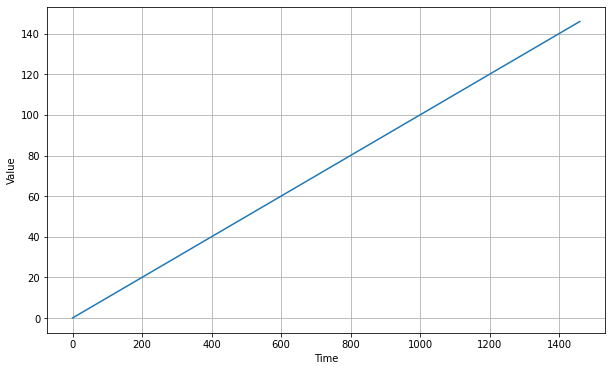

In [10]:
time = np.arange(4*365+1)
series = trend(time,0.1)

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

## Seasonality

In [11]:
def seasonal_pattern(season_time):
    
    return np.where(season_time<0.4, np.cos(season_time*2*np.pi),1/ np.exp(3*season_time))
  
def seasonality(time,period=365, amplitude=1, phase=0):
    
    season_time = ((time+phase)%period)/period
    
    return amplitude*seasonal_pattern(season_time)
    

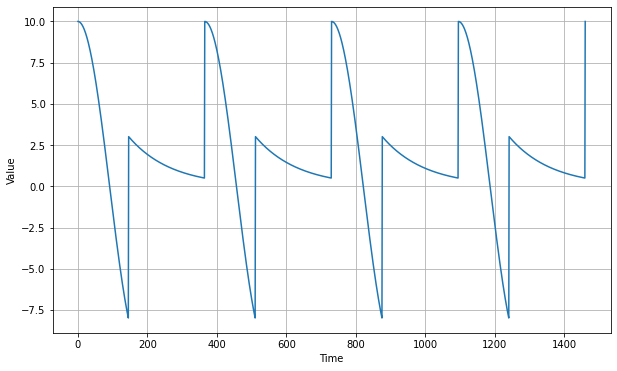

In [12]:
amplitude = 10

series = seasonality(time,period=365,amplitude=amplitude)

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

## Both seasonality and trend

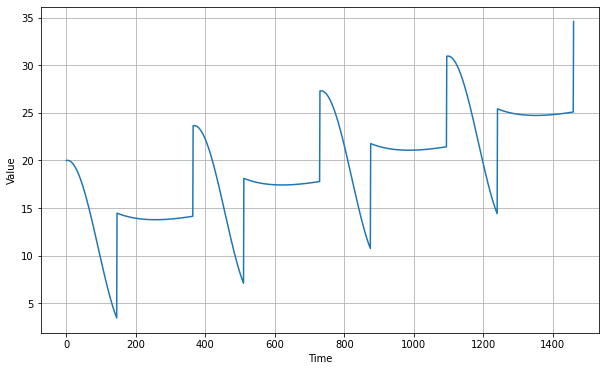

In [17]:
baseline = 10
slope = 0.01

series = baseline + trend(time,slope) + seasonality(time,period=365,amplitude=amplitude)

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

## Noise

In [19]:
def white_noise(time, noise_level=1,seed=None):

    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

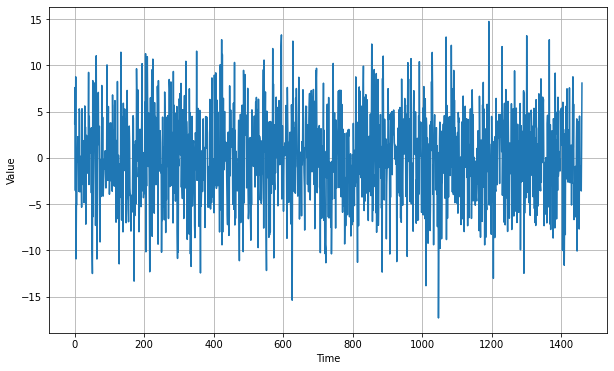

In [20]:
noise_level = 5
noise = white_noise(time,noise_level,seed=94)

plt.figure(figsize=(10,6))
plot_series(time,noise)
plt.show()

### Add the noise to the series

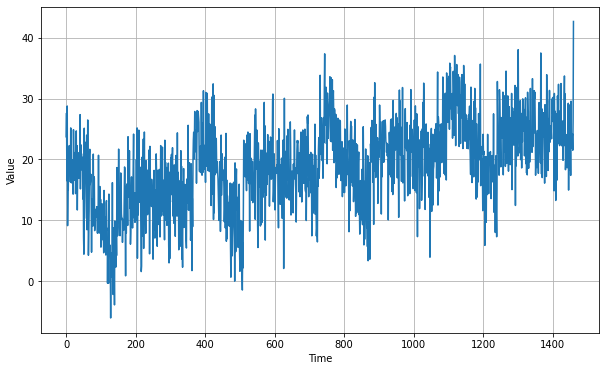

In [21]:
series = series + noise

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()